In [9]:
import pandas as pd
import numpy as np


In [10]:
df=pd.read_csv('dataset')

In [11]:
df=df.drop(columns='Unnamed: 0')

In [12]:
df.head()

,Mode_Sea,Mode_Truck,Mode_Train,Distance,Delay_Status,Delay_Hours,Traffic_Condition,Weather_Conditions_Clear,Weather_Conditions_Foggy,Weather_Conditions_Rain
0,1,0,0,1954,0,0,1,1,0,0
1,0,0,1,2708,0,0,1,1,0,0
2,0,1,0,2179,0,0,0,1,0,0
3,1,0,0,2424,0,0,2,0,0,1
4,1,0,0,4727,0,0,2,0,0,0


In [13]:
df.dtypes

Mode_Sea                    int64
Mode_Truck                  int64
Mode_Train                  int64
Distance                    int64
Delay_Status                int64
Delay_Hours                 int64
Traffic_Condition           int64
Weather_Conditions_Clear    int64
Weather_Conditions_Foggy    int64
Weather_Conditions_Rain     int64
dtype: object

In [14]:
#X- independent variables used for prediction(Everything except delay status in our case)
#y- dependent variable what we are predicting(only delay status)
# train-used to train our model
# test- used to evaulate model performance

from sklearn.model_selection import train_test_split
X= df.drop(columns=['Delay_Status'])
y=df['Delay_Status']

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print(f"Training Features:{X_train.shape}, Training Target:{y_train.shape}")
print(f"Training Features:{X_test.shape}, Training Target:{y_test.shape}")

Training Features:(800, 9), Training Target:(800,)
Training Features:(200, 9), Training Target:(200,)


In [15]:
df['Delay_Status'].value_counts()

Delay_Status
0    703
1    297
Name: count, dtype: int64

NameError: name 'plt' is not defined

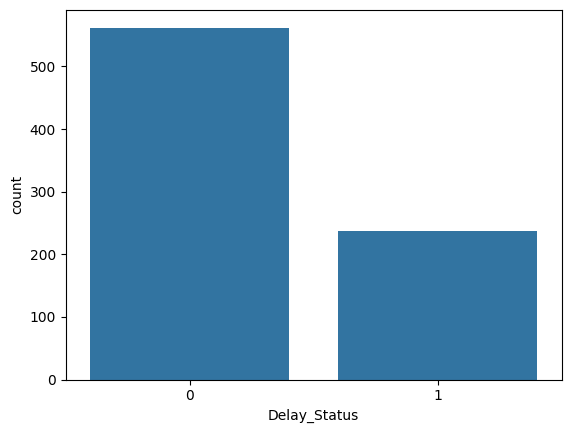

In [16]:
import seaborn as sns

# Visualize distribution in training and testing sets
sns.countplot(x=y_train)
plt.title("Training Set Target Distribution")
plt.show()

sns.countplot(x=y_test)
plt.title("Testing Set Target Distribution")
plt.show()


In [18]:
from sklearn.ensemble import GradientBoostingClassifier
#initialize
gb= GradientBoostingClassifier()

#training the model on train data
gb.fit(X_train, y_train)

#making predictions on test data
y_pred= gb.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.97


In [19]:
from sklearn.svm import SVC
#initialize
sv= SVC()

#training the model on train data
sv.fit(X_train, y_train)

#making predictions on test data
y_pred= sv.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.705


In [20]:
from sklearn.linear_model import LogisticRegression

#initialize
lr= LogisticRegression()

#training the model on train data
lr.fit(X_train, y_train)

#making predictions on test data
y_pred= lr.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))


Accuracy: 0.985


C:\Users\karan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#RandomForest model creation + evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#initialize
rf_model= RandomForestClassifier(random_state=42, class_weight="balanced")

#training the model on train data
rf_model.fit(X_train, y_train)

#making predictions on test data
y_pred= rf_model.predict(X_test)

#evaluation
print("Model Evaluation:\n")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\n Classification Report:", classification_report(y_test,y_pred))
print("\n Confusion Matrix:",confusion_matrix(y_test,y_pred))  


Model Evaluation:

Accuracy: 0.975

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.99      0.98       141
           1       0.97      0.95      0.96        59

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200


 Confusion Matrix: [[139   2]
 [  3  56]]


In [22]:
#cross validation to confirm the models stability and generalizability
from sklearn.model_selection import cross_val_score

cv_score=cross_val_score(rf_model,X_train,y_train,cv=5,scoring='accuracy')
print(f"Cross-Validation Scores: {cv_score}")
print(f"Mean CV Score: {cv_score.mean()}")

Cross-Validation Scores: [0.9625  0.975   0.98125 0.95625 0.96875]
Mean CV Score: 0.96875


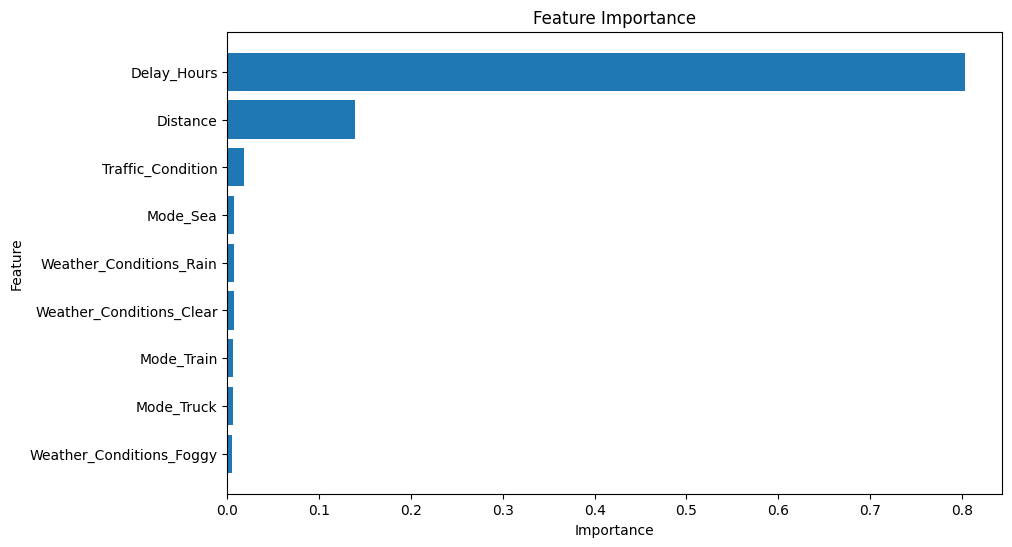

,Feature,Importance
4,Delay_Hours,0.804042
3,Distance,0.139321
5,Traffic_Condition,0.017698
0,Mode_Sea,0.007268
8,Weather_Conditions_Rain,0.007147
6,Weather_Conditions_Clear,0.006753
2,Mode_Train,0.006635
1,Mode_Truck,0.006146
7,Weather_Conditions_Foggy,0.004989


In [44]:
#feature importance which affects the prediction
import matplotlib.pyplot as plt
%matplotlib inline
feat_imp= rf_model.feature_importances_
feat_names= X.columns
imp_df= pd.DataFrame({'Feature':feat_names,'Importance':feat_imp})
imp_df= imp_df.sort_values(by='Importance', ascending=False)

#Plotting
plt.figure(figsize=(10,6))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()
imp_df

In [46]:
import joblib
joblib.dump(rf_model,'delay_pred_model.pk1')

['delay_pred_model.pk1']